Create a class called Current. The initialization method should give an initial velocity and direction which will default to 0 degrees (due north.) Add a method called get_vector() that returns the current velocity and direction. Each time get_vector() is called the velocity will randomly change in the range of 0.5 to 2.0 and the direction will change 5 degrees. (The velocity will be feet per iteration.) 

In [1]:
import random

class Current(object):
    def __init__(self, v=0, d=90): # assigning direction 90 degree as 0 is due north
        self.velocity = v
        self.direction = d

    def get_velocity(self):
        return self.velocity

    def get_direction(self):
        return self.direction

    def get_vector(self):
        self.velocity = self.velocity + random.uniform(0.5, 2.0)
        sf_plus_5 = self.direction + 5
        sf_minus_5 = self.direction - 5
        sf = [sf_plus_5, sf_minus_5]
        self.direction = (
            random.choice(sf) % 360)  # % ensures direction within 0 to 359 degrees
        
        return (self.velocity, self.direction)

    def __str__(self):
        result = (
            f"Current velocity is: {str(self.velocity)} and direction is: {str(self.direction)}"
        )
        return result

In [2]:
c= Current()
print(c.get_vector())

(1.3316234855496412, 85)


Create a class called Location to track the location an object, and a class called Canal to hold our rubber ducks, it also has a width  An attribute of the canal should be the current.  If an object hits the bank the vector will reflect off of the bank - that is if the direction is 45 degrees the reflection would be 135 degrees. 

In [3]:
class Location(object):
    def __init__(self, x, y):
        self.x, self.y = x, y

    def move(self, delta_x, delta_y):
        return Location(self.x + delta_x, self.y + delta_y)

    def get_x(self):
        return self.x

    def get_y(self):
        return self.y

    def dist_from(self, other):
        ox, oy = other.x, other.y
        x_dist, y_dist = self.x - ox, self.y - oy
        return (x_dist**2 + y_dist**2) ** 0.5

    def __str__(self):
        return f"<{self.x}, {self.y}>"

In [4]:
import math 

class Canal(object):
    def __init__(self, width, current):
        self.width = width
        self.current = current
        self.ducks = {}

    def add_duck(self, duck, loc):
        if duck in self.ducks:
            raise ValueError("Duplicate duck")
        else:
            self.ducks[duck] = loc
            #print(f"{duck.name} has been added at origin {loc.get_x()}, {loc.get_y()}")

    def move_duck(self, duck, isUpdate=False):
        if duck not in self.ducks:
            raise ValueError("Duck not in Canal")
        x_dist, y_dist, velocity, direction = duck.take_step(self.current, isUpdate)
        # use move method of Location to get new location
        new_location= self.ducks[duck].move(x_dist, y_dist)
        if new_location.get_x() >= self.width:
            new_location.x=self.width
        elif new_location.get_x() <= 0:
            new_location.x=0
        self.ducks[duck]=new_location
        current_location = self.ducks[duck]
        
        if self.in_bounds(self.ducks[duck]):
            rdx, rdy, d=self.reflect(self.current,self.ducks[duck], velocity, direction)
            self.ducks[duck]=new_location.move(rdx, rdy)
            return [self.ducks[duck],current_location]
        else:
            return [self.ducks[duck], False]

    def get_loc(self, duck):
        if duck not in self.ducks:
            raise ValueError("Duck not in field")
        return self.ducks[duck]

    def in_bounds(self, location):
        return True <= location.x >= self.width or location.x <= 0

    def reflect(self, current, location, d_velocity, d_direction):
        c_velocity, c_direction = current.get_vector()
        w_velocity, w_direction = current.get_vector()
        d_direction=180-float(d_direction)
        dx = d_velocity * math.cos(math.radians(d_direction))
        dy = d_velocity * math.sin(math.radians(d_direction))
        #print("reflect ", d_direction, " degree")
        return (dx, dy, d_direction)

In [5]:
current = Current(6,45)
c = Canal(100,current)
loc = Location(99,0)
c.add_duck("Duck1",loc)
x,y, direction = c.reflect(current,loc,3,45)
print("Duck has been reflected by", direction , "degree and current position is: ", loc.move(x,y))

Duck has been reflected by 135.0 degree and current position is:  <96.87867965644035, 2.121320343559643>


Create a class called Duck (these are our racers) This will be similar to the Drunk class, except the take_step method should add two current vectors, one for the canal and the other for the wind, together to determine the impact of that step.

In [6]:
import math

class Duck(object):
    def __init__(self, name):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return "Anonymous"

    def take_step(self, current, isUpdate=False):
        velocity, direction = current.get_vector()
        wvelocity, wdirection = current.get_vector()
        if isUpdate:
            wvelocity, wdirection = current.update()
        dx = velocity * math.cos(math.radians(direction)) + wvelocity * math.cos(
            math.radians(wdirection)
        )
        dy = velocity * math.sin(math.radians(direction)) + wvelocity * math.sin(
            math.radians(wdirection)
        )
        return (dx, dy, velocity, direction)

In [9]:
duck = Duck("Donald Duck")
print("Duck added: ", duck.name)
current = Current()
print("Duck took step \n", duck.take_step(current))

Duck added:  Donald Duck
Duck took step 
 (0.09406266608675434, 3.741959039558161, 1.0792480578026125, 85)


Create a function called run_race that takes three parameter; the number of ducks, the width of the canal, and the length of the race. Start the race by placing the ducks next to one another in the middle of the canal. Then move the ducks until one crosses completes the length of the race. Each iteration should get the vector for the canal as well as a vector for the wind. Those two parameters will be provided to each duck as they move down the canal.

In [10]:
def run_race(canal_width, num_ducks, race_length):
    current = Current()  # Current Object Creation
    canal = Canal(canal_width, current)  # Canal Object Creation
    canal_length = 400
    ducks = []

    for x in range(num_ducks):
        ducks.append(Duck("duck_name" + str([x])))  # Duck Object Creation

    progress = [[] for _ in range(num_ducks)]
   
    winner = None
    itr = 0
    win_loop = 0
    while not winner:
        win_loop = win_loop + 1
        itr = itr + 1
        first_duck_origin=canal_width/2
        for i, duck in enumerate(ducks):
            if itr == 1:
                if i==0:
                    x_org=first_duck_origin
                else:
                    x_org=first_duck_origin+i*(canal_width/num_ducks)*(-1)**i
                    if x_org < 0:
                        x_org=first_duck_origin+i*(canal_width/num_ducks)/2*(-1)**i
                    first_duck_origin=x_org
                
                origin = Location(x_org, canal_length/2)  # Location Object Creation
                canal.add_duck(duck, origin)
                progress[i].append({"duck obj": duck, "location": origin})

            location, location2 = canal.move_duck(duck)
            if location2:
                progress[i].append({"duck obj": duck, "location": location2})
                progress[i].append({"duck obj": duck, "location": canal.get_loc(duck)})
            else:
                progress[i].append({"duck obj": duck, "location": canal.get_loc(duck)})
            if location.get_y() >= race_length + canal_length / 2:
                winner = duck.name
                break
    return progress



In [11]:
canal_width=20
num_ducks=3
race_length=50
progress = run_race(canal_width, num_ducks, race_length)
final_list = []
for i in range(num_ducks):
    final_list.append(progress[i][-1])

rankings = sorted(final_list, key=lambda x: x["location"].get_y(), reverse=True)
print("----- SORTED LIST AS PER DUCK'S Y LOCATION ---------")
value_rankings = []
for i in range(len(rankings)):
    print(
        rankings[i]["duck obj"],
        "'s y location -->",
        rankings[i]["location"].get_y(), "& its x location -->", rankings[i]['location'].get_x()
    )
    value_rankings.append(rankings[i]["duck obj"])
print("\nWinner is:", value_rankings[0])


----- SORTED LIST AS PER DUCK'S Y LOCATION ---------
duck_name[2] 's y location --> 259.12390466335665 & its x location --> 16.17138641588091
duck_name[1] 's y location --> 235.50960435813724 & its x location --> 5.544386473688485
duck_name[0] 's y location --> 224.22996563563575 & its x location --> 9.07323939113161

Winner is: duck_name[2]


When the first duck completes the race rank all the ducks based on how close they are to the finish (closest is second, and so on.) Plot o graph showing the progress of each duck. 


------------------- RACE RESULTS ---------------------

Rank 1 : duck_name[0]
Rank 2 : duck_name[5]
Rank 3 : duck_name[3]
Rank 4 : duck_name[4]
Rank 5 : duck_name[2]
Rank 6 : duck_name[1]


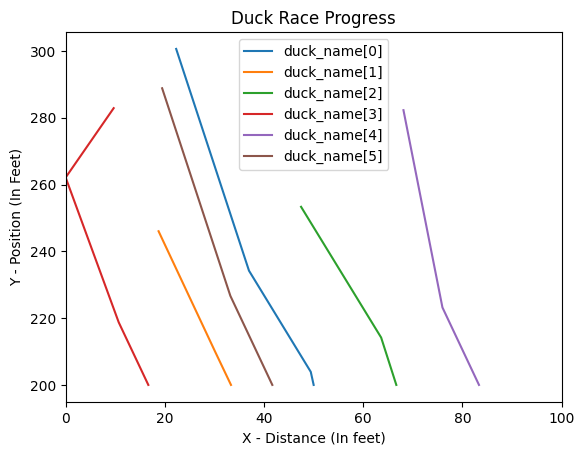

In [13]:
import matplotlib.pyplot as plt

canal_width=100
num_ducks=6
race_length=100
progress = run_race(canal_width, num_ducks, race_length)
final_list = []
for i in range(num_ducks):
    final_list.append(progress[i][-1])

rankings = sorted(final_list, key=lambda x: x["location"].get_y(), reverse=True)
value_rankings = []
for i in range(len(rankings)):
    value_rankings.append(rankings[i]["duck obj"])
print("\n------------------- RACE RESULTS ---------------------\n")
for i, value in enumerate(value_rankings):
    print(f"Rank {i+1} : {value}")
    
    
fig, ax = plt.subplots()

for i, d in enumerate(progress):
    x=[]
    y=[]
    for j, p in enumerate(d):
        x.append(p['location'].get_x())
        y.append(p['location'].get_y())
    ax.plot(x,y,label=p['duck obj'].name)
ax.set_xlim(0,canal_width)
# ax.set_ylim(200,260)
ax.set_xlabel("X - Distance (In feet)")
ax.set_ylabel("Y - Position (In Feet)")
ax.set_title("Duck Race Progress")
plt.legend()
plt.show()

Run a race of 5 ducks in a 20 foot canal for a length of 50 feet. 

In [14]:
canal_width=20
num_ducks=5
race_length=50
progress = run_race(canal_width, num_ducks, race_length)
final_list = []
for i in range(num_ducks):
    final_list.append(progress[i][-1])

rankings = sorted(final_list, key=lambda x: x["location"].get_y(), reverse=True)
value_rankings = []
for i in range(len(rankings)):
    value_rankings.append(rankings[i]["duck obj"])
print("\n------------------- RACE RESULTS ---------------------\n")
for i, value in enumerate(value_rankings):
    print(f"Rank {i+1} : {value}")


------------------- RACE RESULTS ---------------------

Rank 1 : duck_name[2]
Rank 2 : duck_name[1]
Rank 3 : duck_name[0]
Rank 4 : duck_name[4]
Rank 5 : duck_name[3]


Create a subclass of Current called Wind that will model some additional random behavior. 5% of the time the wind can change direction in the range of 15 to 20 degrees and 1% of the time will gust an addition 20 feet per iteration and will last 3 iterations. Make appropriate changes to the run_race function and rerun the race as described in step 5.

In [15]:
class Wind(Current):
    def __init__(self, velocity=0,direction=90):
        super().__init__(velocity, direction)
        self.gust_counter = 0

    def update(self):
        super().get_vector()
        if random.randint(1,100) <= 5: # 5% chance of changing direction
            direction_change = random.uniform(15, 20)
            self.direction += direction_change
            self.direction %= 360

        if random.randint(1,100) <= 1:  # 1% chance of gust
            self.gust_counter = 3

        if self.gust_counter > 0:
            self.velocity += 20
            self.gust_counter -= 1
        return (self.velocity, self.direction)

        

In [16]:
def run_race(canal_width, num_ducks, race_length):
    current = Wind()  # Wind Object Creation
    canal = Canal(canal_width, current)  # Canal Object Creation
    canal_length = 400
    ducks = []

    for x in range(num_ducks):
        ducks.append(Duck("duck_name" + str([x])))  # Duck Object Creation

    progress = [[] for _ in range(num_ducks)]
   
    winner = None
    itr = 0
    win_loop = 0
    while not winner:
        win_loop = win_loop + 1
        itr = itr + 1
        first_duck_origin=canal_width/2
        for i, duck in enumerate(ducks):
            if itr == 1:
                if i==0:
                    x_org=first_duck_origin
                else:
                    x_org=first_duck_origin+i*(canal_width/num_ducks)*(-1)**i
                    if x_org < 0:
                        x_org=first_duck_origin+i*(canal_width/num_ducks)/2*(-1)**i
                    first_duck_origin=x_org
                
                origin = Location(x_org, canal_length/2)  # Location Object Creation
                canal.add_duck(duck, origin)
                progress[i].append({"duck obj": duck, "location": origin})

                if duck not in canal.ducks:
                    raise ValueError("Duck not in Canal")
                x_dist, y_dist, velocity, direction = duck.take_step(canal.current, True) # True as wind object needs to use to accomodate question6
                # use move method of Location to get new location
                new_location= canal.ducks[duck].move(x_dist, y_dist)
                if new_location.get_x() >= canal.width:
                    new_location.x=canal.width
                elif new_location.get_x() <= 0:
                    new_location.x=0
                canal.ducks[duck]=new_location
                current_location = canal.ducks[duck]

                if canal.in_bounds(canal.ducks[duck]):
                    rdx, rdy, d=canal.reflect(canal.current,canal.ducks[duck], velocity, direction)
                    canal.ducks[duck]=new_location.move(rdx, rdy)
                    location=canal.ducks[duck]
                    location2=current_location
                else:
                    location=canal.ducks[duck]
                    location2=False
            
            if location2:
                progress[i].append({"duck obj": duck, "location": location2})
                progress[i].append({"duck obj": duck, "location": canal.get_loc(duck)})
            else:
                progress[i].append({"duck obj": duck, "location": canal.get_loc(duck)})
            if location.get_y() >= race_length + canal_length / 2:
                winner = duck.name
                break
    return progress



----- SORTED LIST AS PER DUCK'S Y LOCATION ---------
duck_name[4] 's y location --> 250.63877609848961 & its x location --> 12.500928874316653
duck_name[3] 's y location --> 226.22477143927128 & its x location --> 17.140878849899686
duck_name[2] 's y location --> 224.46804643569885 & its x location --> 17.99634570354396
duck_name[1] 's y location --> 211.70395597611582 & its x location --> 8.0637232196133
duck_name[0] 's y location --> 204.95980447674705 & its x location --> 10.433926665020495

Winner is: duck_name[4]


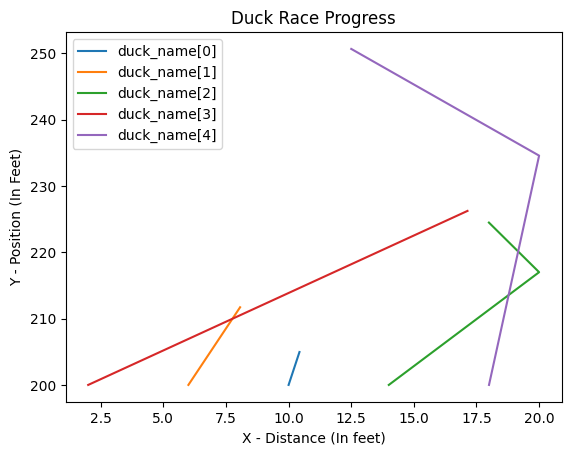

In [17]:
canal_width=20
num_ducks=5
race_length=50
progress = run_race(canal_width, num_ducks, race_length)
final_list = []
for i in range(num_ducks):
    final_list.append(progress[i][-1])

rankings = sorted(final_list, key=lambda x: x["location"].get_y(), reverse=True)
print("----- SORTED LIST AS PER DUCK'S Y LOCATION ---------")
value_rankings = []
for i in range(len(rankings)):
    print(
        rankings[i]["duck obj"],
        "'s y location -->",
        rankings[i]["location"].get_y(), "& its x location -->", rankings[i]['location'].get_x()
    )
    value_rankings.append(rankings[i]["duck obj"])
print("\nWinner is:", value_rankings[0])

fig, ax = plt.subplots()

for i, d in enumerate(progress):
    x=[]
    y=[]
    for j, p in enumerate(d):
        x.append(p['location'].get_x())
        y.append(p['location'].get_y())
    ax.plot(x,y,label=p['duck obj'].name)
# ax.set_xlim(0,canal_width)
# ax.set_ylim(200,400)
ax.set_xlabel("X - Distance (In feet)")
ax.set_ylabel("Y - Position (In Feet)")
ax.set_title("Duck Race Progress")
plt.legend()
plt.show()